# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [8]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [9]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(1.2641)


## Sampling from categorical probabilities with given probabilities

In [10]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(1)


## Animating data

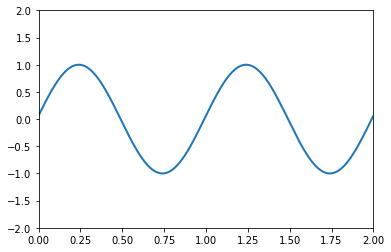

In [11]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

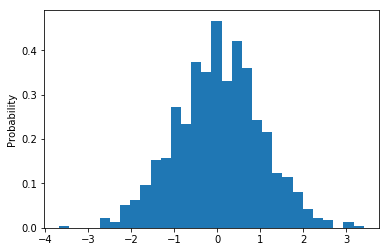

In [12]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

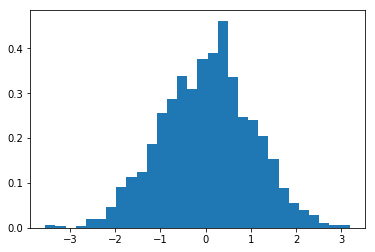

In [4]:
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML


def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

#     ax.set_xlim(( 0, 100))
#     ax.set_ylim((-10, 10))

    d=[]
    # animation function. This is called sequentially
    dist=pyro.distributions.Normal(0, 1)
    def sin(i):
        ax.clear()
        for i in range(1,20):
            d.append(pyro.sample("normal_sampling", dist))
        ax.hist(d,density=True, bins=30)
    anim = animation.FuncAnimation(fig, sin,
                                   frames=100, interval=20, blit=False)
    return HTML(anim.to_jshtml())

animate()

## Task 2

In [3]:
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

n=50000 #number of people


dist2=pyro.distributions.Categorical(probs = torch.tensor([0.01, 0.99]))
dist3=pyro.distributions.Categorical(probs = torch.tensor([0.98, 0.02]))

def isSick(prob,dist1):
    return pyro.sample("categorical_sampling", dist1).item()==1
def isResultPositive(isSick):
    if isSick:
        return pyro.sample("categorical_sampling2", dist2).item()==1
    else:
        return pyro.sample("categorical_sampling3", dist3).item()==1
for p in np.arange(1,101,1):
    prob=p/50000
    dist1=pyro.distributions.Categorical(probs = torch.tensor([1.0-prob, prob]))
    sick_positive=0
    positive=0
    for i in range(0,n):
        sick=isSick(prob,dist1)
        test_result=isResultPositive(sick)
        if test_result:
            positive+=1
            if sick:
                sick_positive+=1
    if positive>0:
        print(sick_positive/positive)

0.0
0.001951219512195122
0.002932551319648094
0.0029211295034079843
0.002857142857142857
0.005045408678102927
0.00897308075772682
0.008088978766430738
0.01466544454628781
0.010956175298804782
0.011375387797311272
0.009940357852882704
0.009940357852882704
0.014227642276422764
0.016831683168316833
0.019230769230769232
0.017051153460381142
0.01694915254237288
0.01556420233463035
0.021463414634146343
0.02644466209598433
0.018043684710351376
0.028128031037827354
0.022351797862001945
0.021739130434782608
0.028624192059095107
0.016753926701570682
0.026794258373205742
0.019830028328611898
0.03458498023715415
0.03225806451612903
0.03595724003887269
0.026923076923076925
0.027804410354745925
0.03571428571428571
0.0285451197053407
0.03747534516765286
0.03262955854126679
0.035480859010270774
0.041501976284584984
0.040082219938335044
0.03388189738625363
0.049476688867745006
0.043355325164938736
0.04129793510324484
0.05301455301455302
0.03527168732125834
0.043922369765066395
0.052336448598130844
0.04